This is a notebook to test on which Predictive Model work well on the data to predict the heart Disease binary variable. This include EDA, data preparation, and predictive modeling

**Let's Start by Importing All Needed Library for This Project**

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix, roc_curve
import warnings 
warnings.filterwarnings('ignore')

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


/kaggle/input/heart-failure-prediction/heart.csv


**Importing the Data Which Used For This Project**

In [2]:
df = pd.read_csv("../input/heart-failure-prediction/heart.csv")
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


The information about the data
1. Age: age of the patient [years]
2. Sex: sex of the patient [M: Male, F: Female]
3. ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
4. RestingBP: resting blood pressure [mm Hg]
5. Cholesterol: serum cholesterol [mm/dl]
6. FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
7. RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
8. MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]
9. ExerciseAngina: exercise-induced angina [Y: Yes, N: No]
10. Oldpeak: oldpeak = ST [Numeric value measured in depression]
11. ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
12. HeartDisease: output class [1: heart disease, 0: Normal]

**Checking the Data Type and Count**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


**Checking the Data Descriptive Statistic**

In [4]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


**Checking the Data Missing value**
in this case there is no missing value, which is very good

In [5]:
df.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

**Looking at the correlation of the variable to our target variable**

In [6]:
df.corr()[['HeartDisease']]

,HeartDisease
Age,0.282039
RestingBP,0.107589
Cholesterol,-0.232741
FastingBS,0.267291
MaxHR,-0.400421
Oldpeak,0.403951
HeartDisease,1.000000


<Axes: >

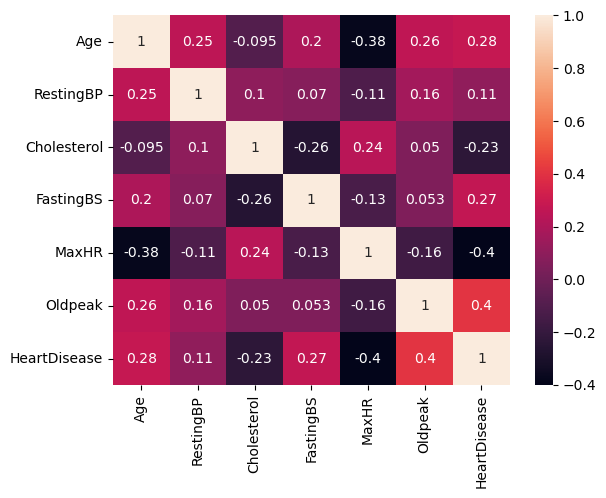

In [7]:
sns.heatmap(df.corr(), annot=True)

**Looking the distribution of the data given**

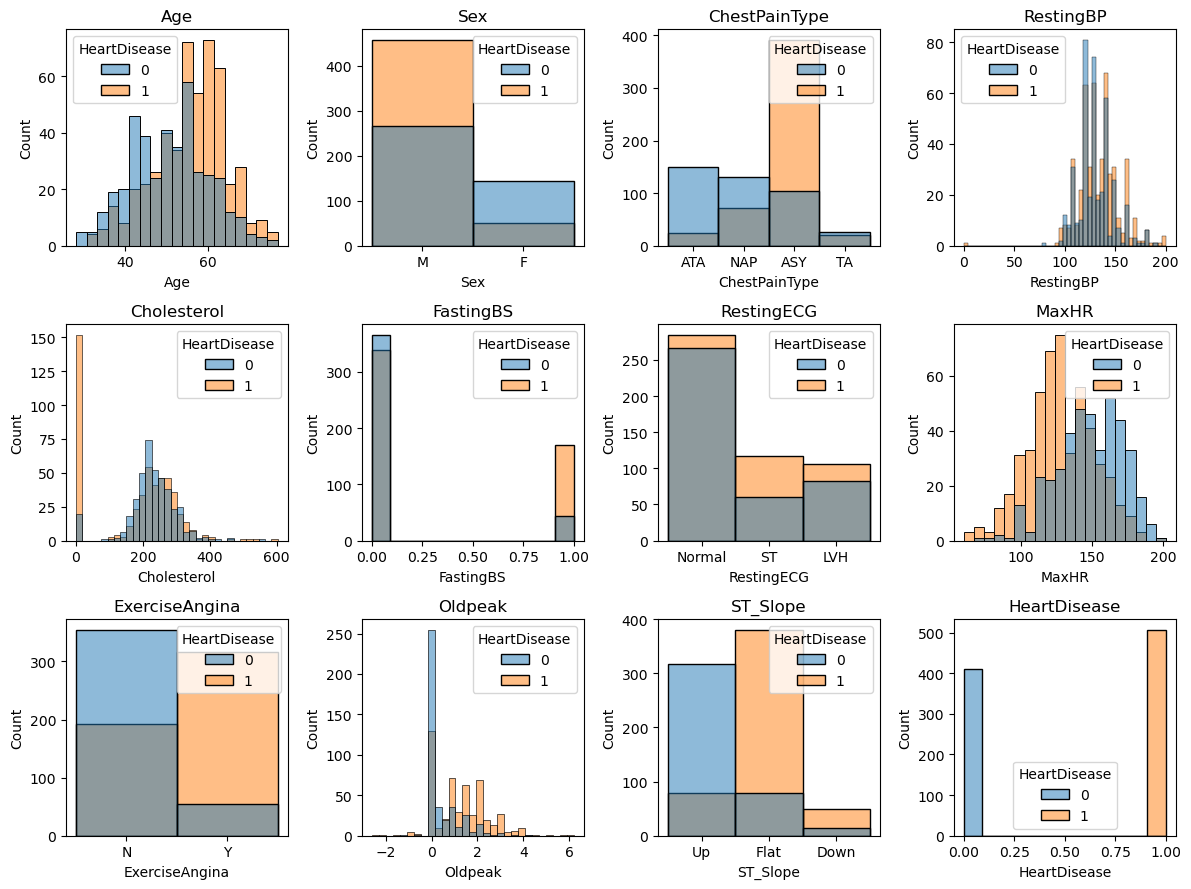

In [8]:
num_rows, num_cols = 3, 4

fig, axs = plt.subplots(num_rows, num_cols, figsize=(12, 9))

axs = axs.ravel()

for i, col in enumerate(df.columns):
    sns.histplot(data=df, x=col, ax=axs[i], hue=df['HeartDisease'])
    axs[i].set_title(col)

plt.tight_layout()

plt.show()

**Encode and Scaling the Data**
first we filter the data according to the variable type. 

Categorical, Numerical, and the Target variable need to be seperated.

then we encode over the categorical data, and scale numerical data.

In [9]:
target = ['HeartDisease']
filtered_features = [i for i in df.columns if i not in target]

categorical_features = ['Sex', 'ChestPainType', 'RestingECG', 'FastingBS', 'ExerciseAngina', 'ST_Slope']
numerical_features = [i for i in filtered_features if i not in categorical_features]

label_encoder = LabelEncoder()
scaler = StandardScaler()

for col in categorical_features:
    if df[col].dtype == 'object':
        df[col] = label_encoder.fit_transform(df[col])
for col in numerical_features:
        df[col] = scaler.fit_transform(df[[col]])
    
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,-1.433140,1,1,0.410909,0.825070,0,1,1.382928,0,-0.832432,2,0
1,-0.478484,0,2,1.491752,-0.171961,0,1,0.754157,0,0.105664,1,1
2,-1.751359,1,1,-0.129513,0.770188,0,2,-1.525138,0,-0.832432,2,0
3,-0.584556,0,0,0.302825,0.139040,0,1,-1.132156,1,0.574711,1,1
4,0.051881,1,2,0.951331,-0.034755,0,1,-0.581981,0,-0.832432,2,0


**making Train-Test Split the dataset**

In [10]:
X = df.drop(['HeartDisease'], axis=1)
y = df['HeartDisease']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"X_train shape : {X_train.shape}")
print(f"X_test shape : {X_test.shape}")
print(f"y_train shape : {y_train.shape}")
print(f"y_test shape : {y_test.shape}")

X_train shape : (734, 11)
X_test shape : (184, 11)
y_train shape : (734,)
y_test shape : (184,)


**Setting Up for Predictive Modeling**

create a list of classifier model to make a comparisson of the model.

In [11]:
# Define a list of models to compare
models = [
    ('Logistic Regression', LogisticRegression()),
    ('Random Forest', RandomForestClassifier()),
    ('Support Vector Machine (SVM)', SVC()),
    ('K-Nearest Neighbors (KNN)', KNeighborsClassifier()),
    ('Naive Bayes', GaussianNB()),
    ('Decision Trees', DecisionTreeClassifier()),
    ('Gradient Boosting Machines (GBM)', GradientBoostingClassifier()),
    ('Neural Networks (Deep Learning)', MLPClassifier()),
    ('AdaBoost', AdaBoostClassifier()),
    ('XGBoost (Extreme Gradient Boosting)', XGBClassifier())
]

# Loop over the models and compare their performance
results = {}
i = 0
for model_name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    results[i] = {
        'Model' : model_name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-score': f1
    }
    i+=1

In [12]:
clf = CatBoostClassifier(cat_features=categorical_features)
clf.fit(X_train, y_train,
        eval_set=(X_test, y_test),
        verbose = 150, plot=False)

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)


results[i] = {
    'Model' : 'CatBoostClassifier',
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1-score': f1
}

Learning rate set to 0.029359
0:	learn: 0.6687249	test: 0.6736164	best: 0.6736164 (0)	total: 56.5ms	remaining: 56.5s
150:	learn: 0.2196635	test: 0.3215906	best: 0.3215906 (150)	total: 369ms	remaining: 2.08s
300:	learn: 0.1579106	test: 0.3180460	best: 0.3156136 (255)	total: 670ms	remaining: 1.56s
450:	learn: 0.1144876	test: 0.3286094	best: 0.3156136 (255)	total: 982ms	remaining: 1.2s
600:	learn: 0.0831515	test: 0.3309584	best: 0.3156136 (255)	total: 1.29s	remaining: 855ms
750:	learn: 0.0632699	test: 0.3367991	best: 0.3156136 (255)	total: 1.59s	remaining: 528ms
900:	learn: 0.0504272	test: 0.3419970	best: 0.3156136 (255)	total: 1.91s	remaining: 209ms
999:	learn: 0.0441022	test: 0.3467839	best: 0.3156136 (255)	total: 2.12s	remaining: 0us

bestTest = 0.3156135512
bestIteration = 255

Shrink model to first 256 iterations.


**Now we look at the metric of each Model to Compare it**

In [13]:
# Convert results dictionary to a pandas DataFrame
results_df = pd.DataFrame(results)

# Transpose the DataFrame to have models as rows and metrics as columns
results_df = results_df.T

# Print the model comparison results
print("Model Comparison Results:")
results_df

Model Comparison Results:


,Model,Accuracy,Precision,Recall,F1-score
0,Logistic Regression,0.842391,0.90625,0.813084,0.857143
1,Random Forest,0.880435,0.920792,0.869159,0.894231
2,Support Vector Machine (SVM),0.858696,0.893204,0.859813,0.87619
3,K-Nearest Neighbors (KNN),0.86413,0.93617,0.82243,0.875622
4,Naive Bayes,0.842391,0.882353,0.841121,0.861244
5,Decision Trees,0.793478,0.863158,0.766355,0.811881
6,Gradient Boosting Machines (GBM),0.875,0.92,0.859813,0.888889
7,Neural Networks (Deep Learning),0.875,0.928571,0.850467,0.887805
8,AdaBoost,0.853261,0.908163,0.831776,0.868293
9,XGBoost (Extreme Gradient Boosting),0.853261,0.9,0.841121,0.869565


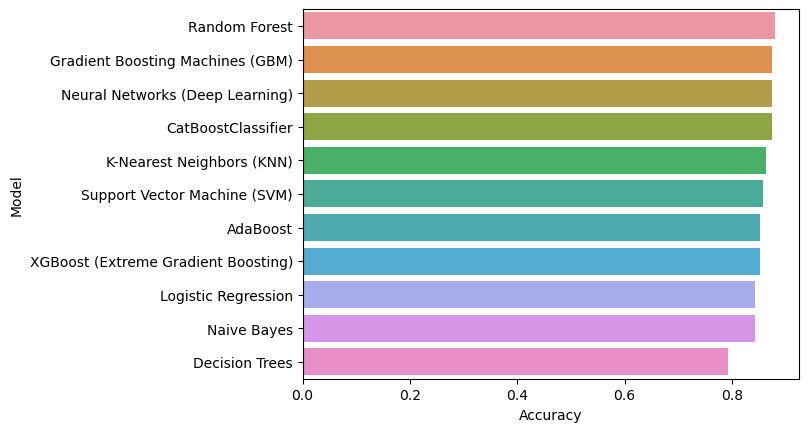

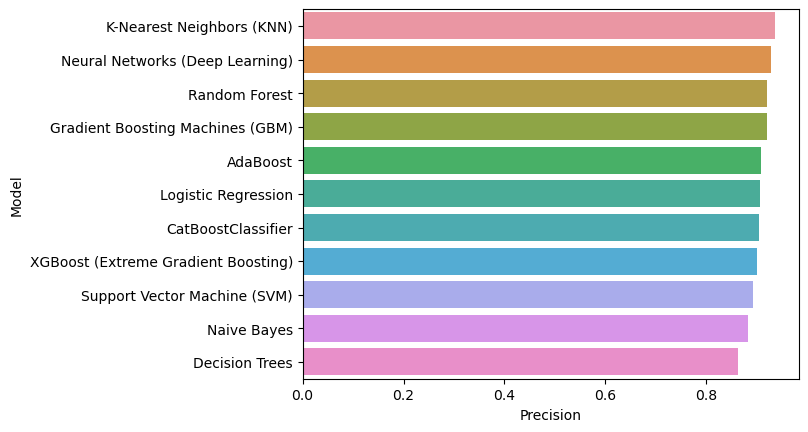

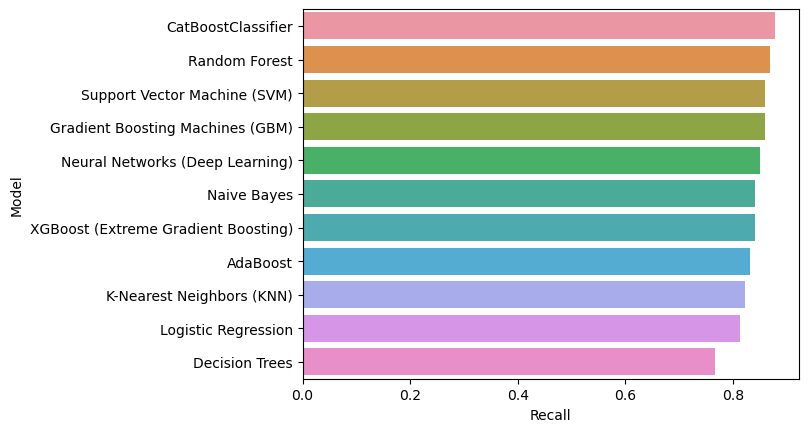

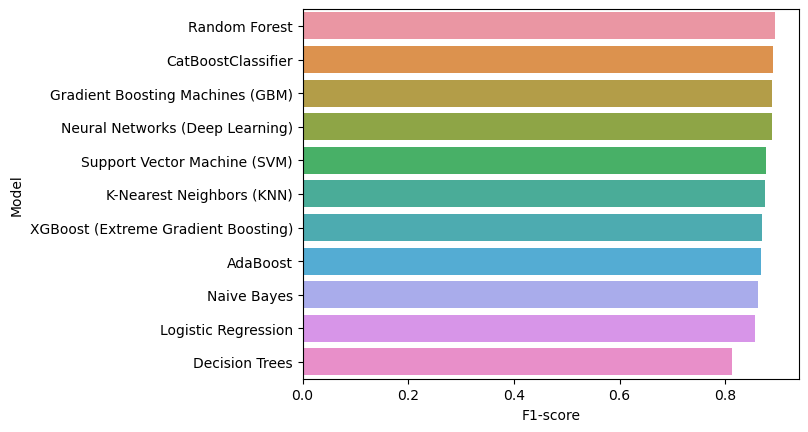

In [14]:
for i in results_df.columns:
    if i != 'Model':
        sns.barplot(y='Model',x=i, data=results_df, order=results_df.sort_values(i, ascending = False).Model)
        plt.show()

Found out that RandomForest has better performance on this case. then we look indepth on confusion matrix and ROC AUC.

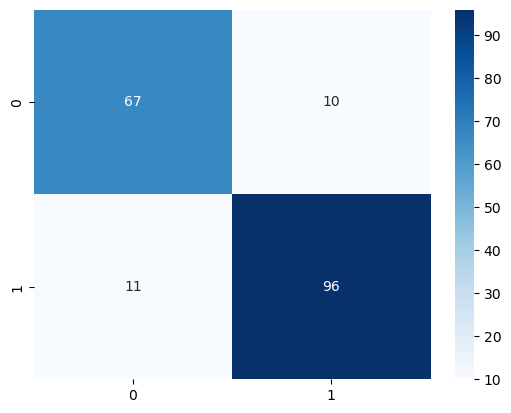

In [15]:
model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='.0f', cmap='Blues')
plt.show()

In [16]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.87      0.86        77
           1       0.91      0.90      0.90       107

    accuracy                           0.89       184
   macro avg       0.88      0.88      0.88       184
weighted avg       0.89      0.89      0.89       184



roc_auc_score: 0.939677145284622


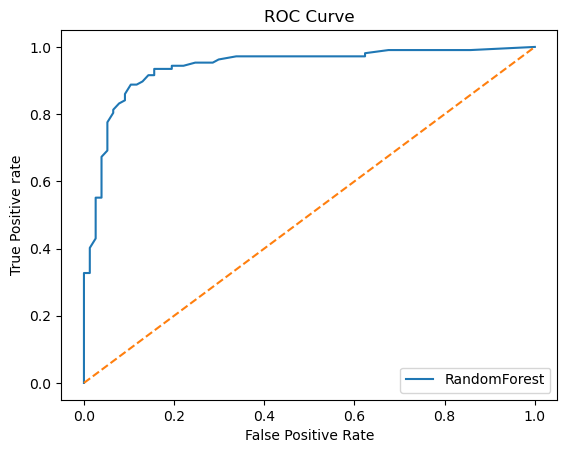

In [17]:
y_pred_prob = model.predict_proba(X_test)
print('roc_auc_score:', roc_auc_score(y_test, y_pred_prob[:,1]))

fpr, tpr, thresh = roc_curve(y_test, y_pred_prob[:,1], pos_label=1)

random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)
plt.plot(fpr, tpr, linestyle='-', label='RandomForest')
plt.plot(p_fpr, p_tpr, linestyle='--')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend()
plt.show()

Thats All thanks for reading, feel free to comment so i can improve my skills :D